In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import nltk.tokenize as nt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from string import punctuation
import itertools
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk
import re # For Regex 
import string # For punctuation
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#reading dataset
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'latin', header=None,engine='python')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df = df.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})
df.head()

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.drop(df.columns[[1,2,3,4]], axis=1, inplace=True)
df.head()

,target,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
#check for missing values
print(df.isnull().sum())
# remove missing values
df.dropna(inplace=True)
df.info()

target     0
content    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   content  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [11]:
df['target'] = df['target'].replace([0, 4],[0,1])

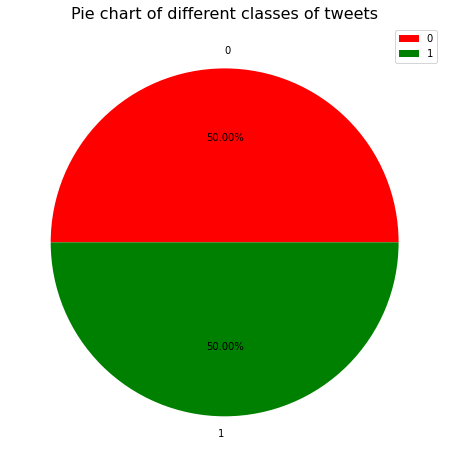

In [12]:
fig = plt.figure(figsize=(8,8))
targets = df.groupby('target').size()
targets.plot(kind='pie', subplots=True, figsize=(10, 8), autopct = "%.2f%%", colors=['red','green'])
plt.title("Pie chart of different classes of tweets",fontsize=16)
plt.ylabel("")
plt.legend()
plt.show()

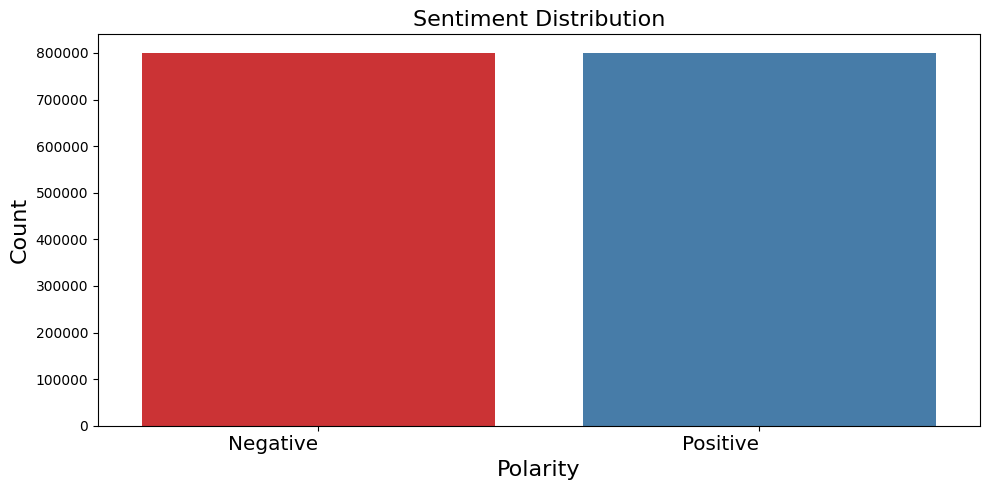

In [13]:
plt.figure(figsize=(10,5), dpi = 100)
chart=sns.countplot(x='target',data=df,palette='Set1')
plt.xlabel('Polarity', fontsize=16)
plt.ylabel('Count', fontsize=16)
lables=['Negative','Positive']
chart.set_xticklabels(lables, rotation=0,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.title("Sentiment Distribution", fontsize=16)
plt.tight_layout()

In [14]:
df['target'].value_counts()

1    800000
0    800000
Name: target, dtype: int64

In [15]:
from string import punctuation
print("DATA CLEANING -- \n")
# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

def replace_emojis(t):
    '''
     This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad.
    '''
    emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

    emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

    words = t.split()
    reformed = []
    for w in words:
        if w in emoji_happy:
            reformed.append("happy")
        elif w in emoji_sad:
            reformed.append("sad") 
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t


def replace_smileys(t):
    '''
    This function replaces happy smileys with "happy" and sad smileys with "sad.
    '''
    emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

    emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

    words = t.split()
    reformed = []
    for w in words:
        if w in emoticons_happy:
            reformed.append("happy")
        elif w in emoticons_sad:
            reformed.append("sad") 
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t

def replace_contractions(t):
    '''
    This function replaces english lanuage contractions like "shouldn't" with "should not"
    '''
    cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
    "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
    "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
    "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
    "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
    "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
    "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
    "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
    "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
    "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
    words = t.split()
    reformed = []
    for w in words:
        if w in cont:
            reformed.append(cont[w])
        else:
            reformed.append(w)
    t = " ".join(reformed)
    return t  

def remove_single_letter_words(t):
    '''
    This function removes words that are single characters
    '''
    words = t.split()
    reformed = []
    for w in words:
        if len(w) > 1:
            reformed.append(w)
    t = " ".join(reformed)
    return t  

print("Cleaning the tweets from the data.\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

def dataclean(t):
    '''
    This function cleans the tweets.
    '''
    t = replace_smileys(t) # replace handwritten emojis with their feeling associated
    t = t.lower() # convert to lowercase
    t = replace_contractions(t) # replace short forms used in english  with their actual words
    t = replace_emojis(t) # replace unicode emojis with their feeling associated
    t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
    t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
    t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
    t = re.sub('#', '', t) # remove '#'
    t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
    t = re.sub('@[^\s]+', '', t) # remove usernames
    t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
    t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
    t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
    t = t.replace('\\\\', '')
    t = t.replace('\\', '')
    t = remove_single_letter_words(t) # removes single letter words
  
    return t

df['content'] = df['content'].apply(dataclean)
print("Tweets have been cleaned.")

DATA CLEANING -- 

Cleaning the tweets from the data.

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove 'RT'. 
Replace all URLs and Links with word 'URL'.
Remove all punctuations.
Removes single letter words.

Tweets have been cleaned.


In [16]:
df.head()

,target,content
0,0,awww that is bummer you shoulda got david carr...
1,0,is upset that he cannot update his facebook by...
2,0,dived many times for the ball managed to save ...
3,0,my whole body feels itchy and like its on fire
4,0,no it is not behaving at all am mad why am her...


In [17]:
english_stopwords = stopwords.words('english')
#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets


In [18]:
def preprocess(content, stem=False):
    content = re.sub(regex, ' ', str(content).lower()).strip()
    tokens = []
    for token in content.split():
        if token not in english_stopwords:
            tokens.append(stemmer.stem(token))
    return " ".join(tokens)

In [19]:
df.content = df.content.apply(lambda x: preprocess(x))
df.head()


,target,content
0,0,awww bummer shoulda got david carr third day
1,0,upset cannot updat facebook text might cri res...
2,0,dive mani time ball manag save rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav mad cannot see


In [22]:
df.to_csv('preprocessed_file.csv', index = False)
